In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [5]:
train_1 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train1.csv')
train_2 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train2.csv')
train_3 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train3.csv')
train_4 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train4.csv')

test = pd.read_csv("https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/test.csv")

In [6]:
train_1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train_1.shape

(7500, 785)

In [8]:
train = pd.concat([train_1,train_2,train_3,train_4])

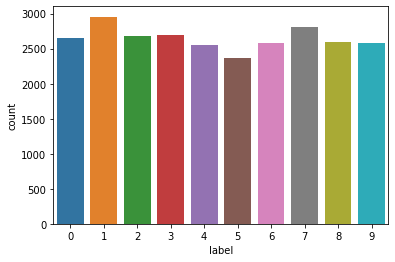

In [9]:
sns.countplot(train['label'])

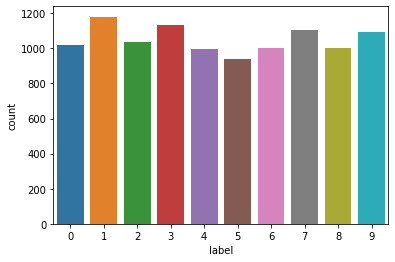

In [10]:
sns.countplot(test['label'])

In [11]:
x_train = train.drop('label',axis=1)
y_train = train['label']

x_test= test.drop('label',axis=1)
y_test=test['label']

In [12]:
x_train = x_train.values.astype('float32')
y_train = y_train.values.astype('int32')
x_test = x_test.values.astype('float32')

In [13]:
#Veamos la forma que tiene x_train
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
print('Para x_train:',len(x_train),'\nPara train',train.shape)

Para x_train: 26460 
Para train (26460, 785)


In [15]:
x_train[0].max()

255.0

### Visualizando las imágenes

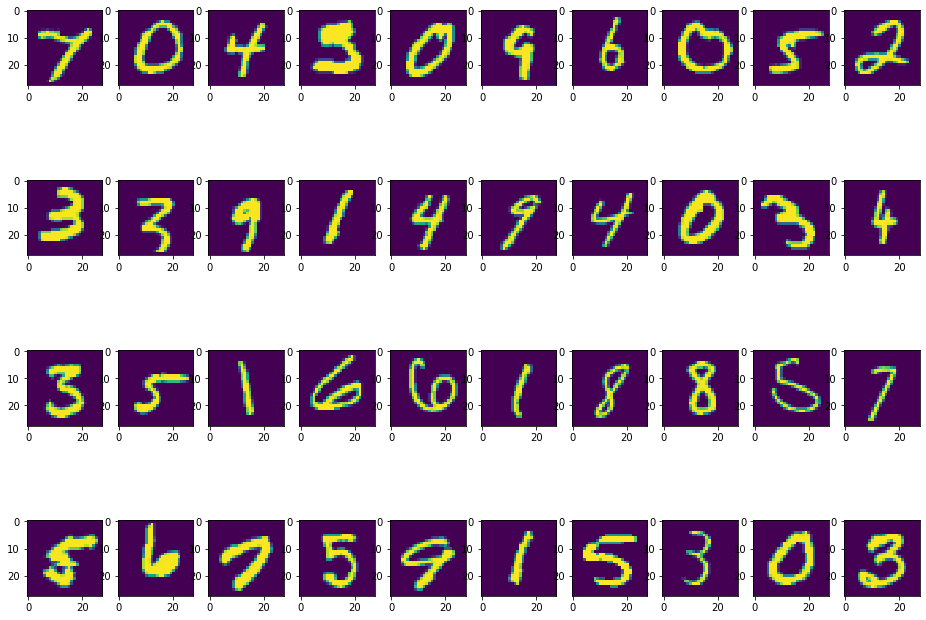

In [16]:
plt.figure(figsize=(16,12))
x, y = 10, 4 #Defino las dimensiones

for i in range(40):
    plt.subplot(y,x,i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')

### Normalizando los datos

In [17]:
x_train = x_train/255.0
x_test = x_test/255.0

In [18]:
x_train[0].shape

(784,)

### Reshape

In [19]:
x_train.shape

(26460, 784)

In [20]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [22]:
X_train.shape

(26460, 28, 28, 1)

In [23]:
len(y_train)

26460

In [24]:
#¿Está el gpu activo?
import tensorflow as tf
tf.test.gpu_device_name()
#Debe salir '/device:GPU:0'

'/device:GPU:0'

In [25]:
#Qué GPU estoy usandO'
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11890496114464503193, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7571020936596109188
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1856307858273634279
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14648777152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1192316691032896344
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

### Keras

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Transformaremos nuestros datos y luego crearemos un X_train y X_test

In [27]:
keras.utils.to_categorical(y_train, 10)

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
# Convertimos a los targets en vectores binarios (One hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [29]:
len(Y_train)

23814

In [30]:
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

### Nuetra primera red Neuronal con Keras

In [31]:
model = Sequential()

model.add(Flatten(input_shape=input_shape)) 

model.add(Dense(10, activation='relu'))

model.add(Dense(18, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 18)                198       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2432      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [33]:
#Por qué me va a servir esto?
weights, biases = model.get_layer('dense_12').get_weights()
weights

ValueError: ignored

In [34]:
#Compilo el modelo

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
history = model.fit(X_train,Y_train, epochs=30, batch_size=batch_size,
                     validation_data=(X_valid, Y_valid))

Train on 23814 samples, validate on 2646 samples
Epoch 1/30
23814/23814 [==============================] - 3s 128us/step - loss: 2.2387 - accuracy: 0.1994 - val_loss: 2.0601 - val_accuracy: 0.2989
Epoch 2/30
23814/23814 [==============================] - 1s 53us/step - loss: 1.6581 - accuracy: 0.3984 - val_loss: 1.3461 - val_accuracy: 0.5261
Epoch 3/30
23814/23814 [==============================] - 1s 49us/step - loss: 1.0602 - accuracy: 0.6463 - val_loss: 0.8642 - val_accuracy: 0.7143
Epoch 4/30
23814/23814 [==============================] - 1s 56us/step - loss: 0.6810 - accuracy: 0.7929 - val_loss: 0.8124 - val_accuracy: 0.7430
Epoch 5/30
23814/23814 [==============================] - 1s 51us/step - loss: 0.5319 - accuracy: 0.8431 - val_loss: 0.6708 - val_accuracy: 0.7952
Epoch 6/30
23814/23814 [==============================] - 1s 48us/step - loss: 0.4689 - accuracy: 0.8617 - val_loss: 0.4542 - val_accuracy: 0.8587
Epoch 7/30
23814/23814 [==============================] - 1s 48us/st

### Evaluando el performance de nuestra red

In [36]:
import matplotlib.pyplot as plt
history.params

{'batch_size': 64,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 23814,
 'steps': None,
 'verbose': 1}

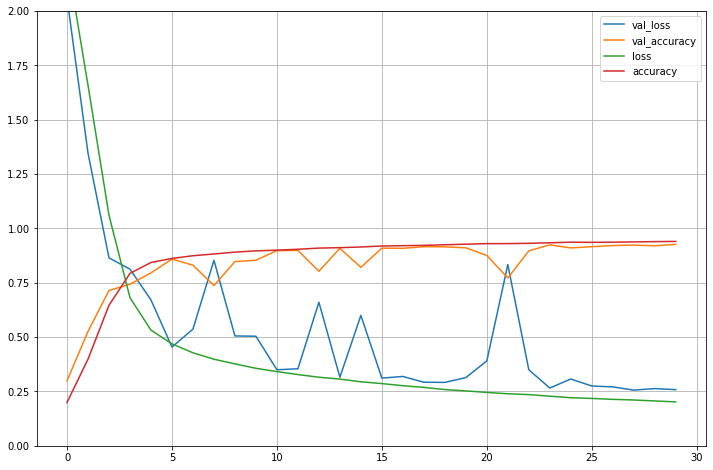

In [37]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,2) #set the vertical range to [0-1]
plt.show()

###Usando otro tipo de modelo

> Como agregar Batch Normalization y DropOut?

> Cambiando el Optimizador a Adam




In [38]:
model_2 = Sequential()
model_2.add(Flatten())
model_2.add(BatchNormalization())
model_2.add(Dense(128, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))
model_2.add(Dense(128, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))
model_2.add(Dense(128, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.05))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

In [39]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer="Adam", metrics=['accuracy'])

In [40]:
history = model_2.fit(X_train,Y_train, epochs=30, batch_size=batch_size,
                     validation_data=(X_valid, Y_valid))

Train on 23814 samples, validate on 2646 samples
Epoch 1/30
23814/23814 [==============================] - 3s 145us/step - loss: 0.5771 - accuracy: 0.8243 - val_loss: 0.1997 - val_accuracy: 0.9437
Epoch 2/30
23814/23814 [==============================] - 3s 118us/step - loss: 0.2603 - accuracy: 0.9176 - val_loss: 0.1664 - val_accuracy: 0.9509
Epoch 3/30
23814/23814 [==============================] - 3s 120us/step - loss: 0.2101 - accuracy: 0.9340 - val_loss: 0.1535 - val_accuracy: 0.9565
Epoch 4/30
23814/23814 [==============================] - 3s 121us/step - loss: 0.1757 - accuracy: 0.9439 - val_loss: 0.1475 - val_accuracy: 0.9599
Epoch 5/30
23814/23814 [==============================] - 3s 117us/step - loss: 0.1574 - accuracy: 0.9500 - val_loss: 0.1465 - val_accuracy: 0.9577
Epoch 6/30
23814/23814 [==============================] - 3s 122us/step - loss: 0.1434 - accuracy: 0.9542 - val_loss: 0.1416 - val_accuracy: 0.9611
Epoch 7/30
23814/23814 [==============================] - 3s 11

In [41]:
X_train.shape

(23814, 28, 28, 1)

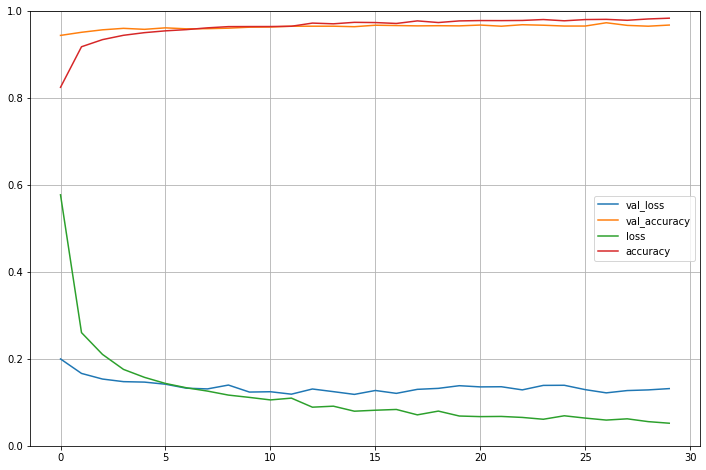

In [42]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()

### Ahora, si ponemos redes convolucionales

In [43]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [45]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [46]:
history = model.fit(X_train,Y_train, epochs=30, batch_size=batch_size,
                     validation_data=(X_valid, Y_valid))

Train on 23814 samples, validate on 2646 samples
Epoch 1/30
23814/23814 [==============================] - 9s 371us/step - loss: 0.2211 - accuracy: 0.9330 - val_loss: 0.1270 - val_accuracy: 0.9615
Epoch 2/30
23814/23814 [==============================] - 3s 121us/step - loss: 0.0754 - accuracy: 0.9767 - val_loss: 0.1225 - val_accuracy: 0.9683
Epoch 3/30
23814/23814 [==============================] - 3s 120us/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0686 - val_accuracy: 0.9800
Epoch 4/30
23814/23814 [==============================] - 3s 125us/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0459 - val_accuracy: 0.9853
Epoch 5/30
23814/23814 [==============================] - 3s 118us/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0410 - val_accuracy: 0.9864
Epoch 6/30
23814/23814 [==============================] - 3s 118us/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0655 - val_accuracy: 0.9834
Epoch 7/30
23814/23814 [==============================] - 3s 12

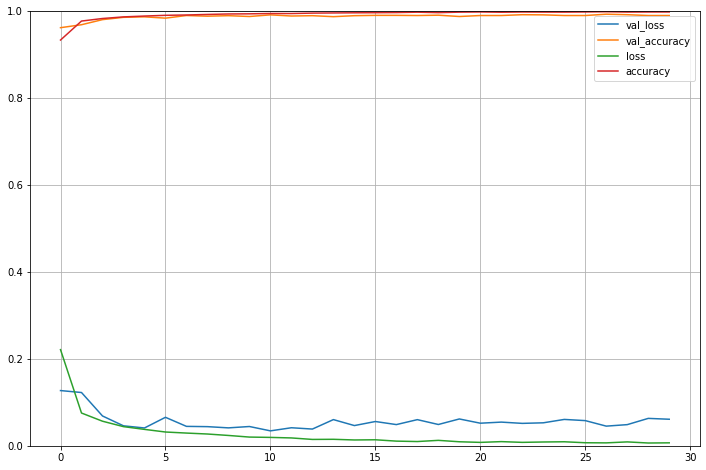

In [47]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()